In [1]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt #Data Visualization 
%matplotlib inline
import seaborn as sns  #Python library for Visualization

In [2]:
#load dataset
df = pd.read_csv('dataFromInformatics.csv', sep=",", encoding="ISO-8859-1")
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
#total rows and colums in the dataset
df.shape

(2227, 3)

In [4]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
x1    2222 non-null float64
x2    2224 non-null float64
y     2227 non-null int64
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [5]:
df.tail()

,x1,x2,y
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0
2226,109.624009,1.000000e+08,0


In [6]:
#check fo missing values in computation
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [7]:
df['x1'] = df['x1'].fillna(np.mean(df['x1']))

In [8]:
df['x2'] = df['x2'].fillna(np.mean(df['x2']))

In [9]:
#check fo missing values in computation
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [54]:
df.y.unique()

array([1, 0], dtype=int64)

In [55]:
#group into respective clusters
df0 = df[df['y'] == 0]
df1 = df[df['y'] == 1]

Text(0, 0.5, 'X2')

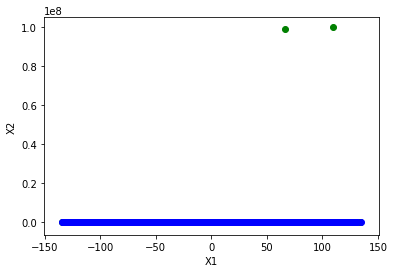

In [62]:
plt.scatter(df0['x1'], df0['x2'], color='green')
plt.scatter(df1['x1'], df1['x2'], color='blue')

plt.xlabel('X1')
plt.ylabel('X2')

In [10]:
X = df.drop(['y'], axis='columns')
y = df['y']

In [11]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
from sklearn.svm import SVC


In [13]:
model = SVC(gamma='auto', kernel="linear")
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
model.score(X_test,y_test)

0.5650224215246636

In [17]:
from sklearn.svm import SVC
model2 = SVC(C=100,kernel="rbf")
model2.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
model2.score(X_test,y_test)

0.7376681614349776

In [28]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV?

In [29]:
#use gridsearchcv to get the best model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [53]:
def best_model_using_gridsearchcv(x,y_):
    algos = {
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion':["gini","entropy"],
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'solver': ['lbfgs', 'liblinear']
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                #'n_neighors': [5, 10 ],
                #'p':[2,8],
                'metric':['euclidean','minkowski']
            }
        }
    }
    
    #get the accuracy scores
    scores = []
    cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for key, value in algos.items():
        gs = GridSearchCV(value['model'], value['params'], cv=cv, return_train_score=False)
        gs.fit(x,y_)
        scores.append({
            'model': key,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    #print(scores)   
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,decision_tree,0.934529,{'criterion': 'gini'}
1,logistic_regression,0.581166,{'solver': 'lbfgs'}
2,KNN,0.946637,{'metric': 'euclidean'}


## Observation

From the above it can be concluded that Knn is the best model to be used because it gives the best model accuracy